In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns


In [5]:
%matplotlib inline

In [7]:
df=pd.read_csv('C:\\Users\\pc\\Documents\\Self_Learning\\[FreeCourseSite.com] Udemy - Python for Data Science and Machine Learning Bootcamp\\13. Data Capstone Project\\911.csv')

In [10]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [12]:
df['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [14]:
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [15]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [16]:
df['title'].nunique()

148

In [18]:
x=df['title'].iloc[0]
x

'EMS: BACK PAINS/INJURY'

In [21]:
x=x.split(':')
x[0]

'EMS'

In [22]:
df['Reason']=df['title'].apply(lambda title : title.split(':')[0])

In [24]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

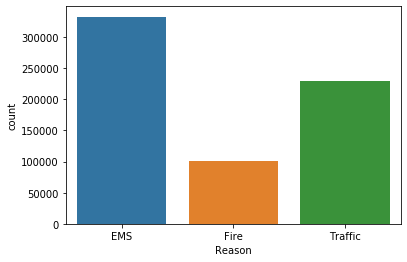

In [26]:
sns.countplot(x='Reason',data=df)

In [28]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [31]:
x=df['timeStamp'].iloc[0]
x.hour

17

In [34]:
x.dayofweek

3

In [35]:
df['hour']=df['timeStamp'].apply( lambda time : time.hour)

In [37]:
df['weekday']=df['timeStamp'].apply( lambda time : time.dayofweek)
df['month']=df['timeStamp'].apply( lambda time : time.month)

In [38]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [39]:
df['weekday']=df['weekday'].map(dmap)

In [40]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,weekday,month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Thu,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Thu,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,Thu,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,Thu,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,Thu,12


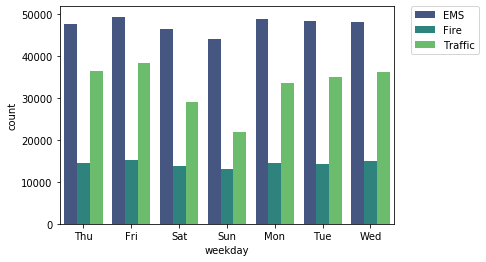

In [45]:
sns.countplot(x='weekday',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

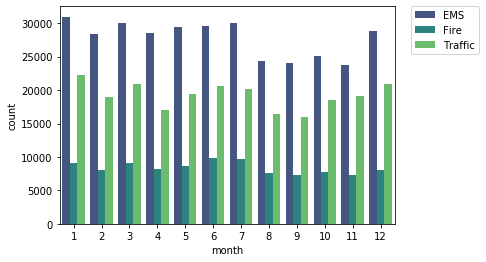

In [46]:
sns.countplot(x='month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [49]:
df1=df[(df['month']!=9) & (df['month']!=10) & (df['month']!=11)   ]

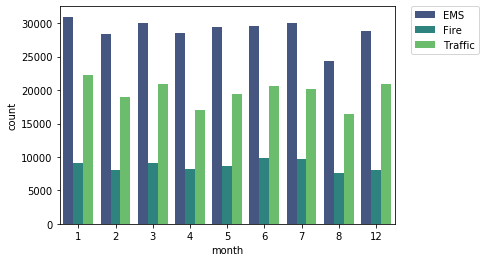

In [50]:
sns.countplot(x='month',data=df1,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

No handles with labels found to put in legend.


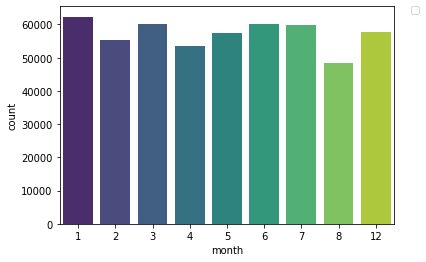

In [51]:
sns.countplot(x='month',data=df1,palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [55]:
byMonth=df1.groupby('month').count()

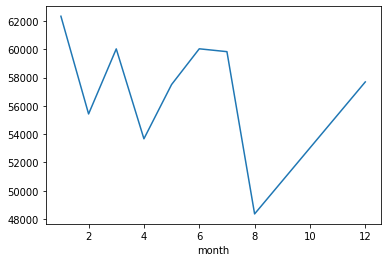

In [56]:
byMonth['lat'].plot()

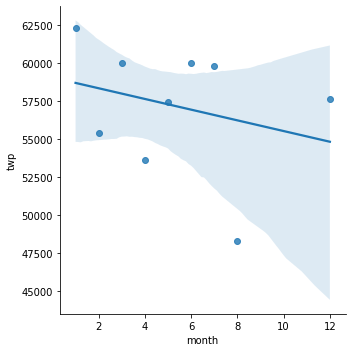

In [59]:
sns.lmplot(x='month',y='twp',data=byMonth.reset_index())

In [63]:
x=df1['timeStamp'].iloc[0]
x.time()

datetime.time(17, 10, 52)

In [64]:
df1['Date']=df1['timeStamp'].apply(lambda t : t.date())

C:\ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
df1.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,weekday,month
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


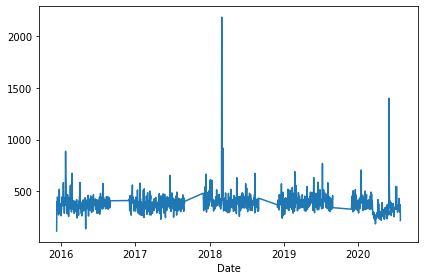

In [69]:
df1.groupby('Date').count()['lat'].plot()
plt.tight_layout()

In [71]:
df1.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reason', 'hour', 'weekday', 'month', 'Date'],
      dtype='object')

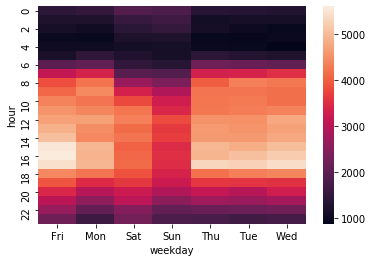

In [79]:
dayhour=df1.groupby(['hour','weekday']).count()['Reason'].unstack()
sns.heatmap(dayhour)

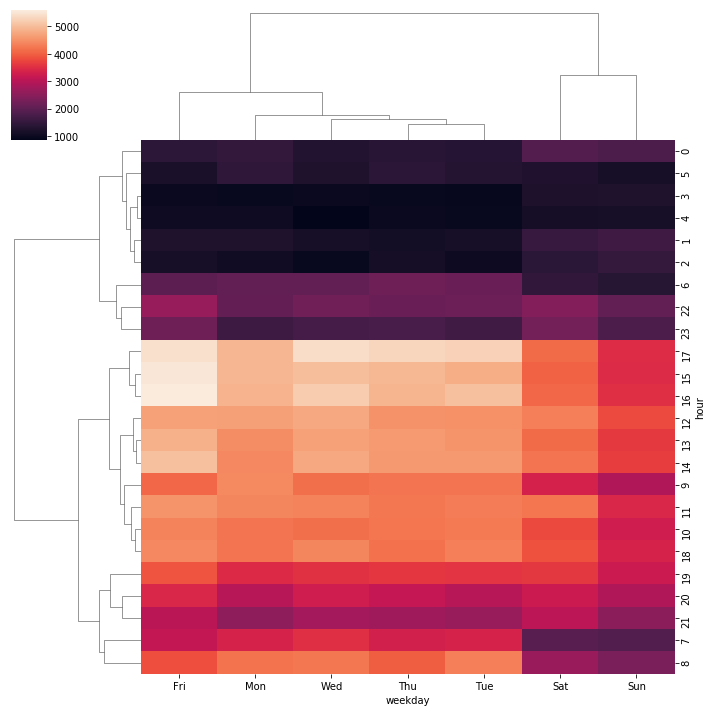

In [80]:
sns.clustermap(dayhour)